# One drug analysis

In the introduction we have analysed a IC50 input file. We performed a full analysis that is we analyse all associations between all drugs and 
all features. This may take a while and sometimes one is just interested in a single drug or a sub set of drugs. In this notebook, we show how to 
restrict the analysis.

In [1]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = (10,6)

Populating the interactive namespace from numpy and matplotlib


As before, we create an ANOVA instance. Pur input IC50 will be the test file

In [2]:
from gdsctools import ANOVA, ic50_test

In [3]:
an = ANOVA(ic50_test)

Drugs are stored in the **drugIds** in case you forgot the drug you are interested in.. eg. the first drug identifer is 

In [4]:
drug_name = an.drugIds[0]

In [5]:
results = an.anova_one_drug(drug_name)

 [--------         21%                  ] 10 of 47 complete in 0.1 sec[---------------- 42%                  ] 20 of 47 complete in 0.1 sec[-----------------63%----              ] 30 of 47 complete in 0.1 sec[-----------------85%------------      ] 40 of 47 complete in 0.2 sec[-----------------100%-----------------] 47 of 47 complete in 0.2 sec

Now, you can create an HTML report or simply call one of the volcano plot

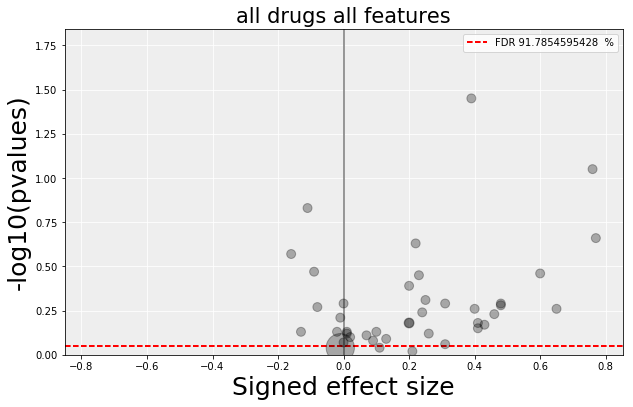

In [6]:
results.volcano()

### DRAFT version to use new JS volcano plot (v 0.12)

In [7]:
from gdsctools.report import ReportMain
from gdsctools.volcano import VolcanoANOVAJS
v = VolcanoANOVAJS(results)

In [8]:
html = v.render_drug(999)

In [9]:
report = ReportMain(template_filename="volcano_standalone.html")

Created directory report


In [10]:
report.jinja['volcano_jsdata'] = html

In [11]:
report.write()

In [12]:
from IPython.display import HTML

In [13]:
display(HTML('<iframe src="report/index.html" width="100%" height="600px"></iframe>'))